In [41]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.style.use('ggplot')

In [42]:
df = pd.read_csv("wine.data",header=None)

In [280]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
import re
expr = re.compile('.*[0-9]+\)\s?(\w+).*')

df_header = open("wine.names")
header_names = ['Class']
for l in df_header.readlines():
    if len(expr.findall(l.strip()))!=0:
        header_names.append(expr.findall(l.strip())[0])
        
df_header.close()
header_names

['Class',
 'Alcohol',
 'Malic',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Total',
 'Flavanoids',
 'Nonflavanoid',
 'Proanthocyanins',
 'Color',
 'Hue',
 'OD280',
 'Proline']

In [12]:
df.columns = header_names

In [149]:
df.describe()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Total,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
from sklearn import preprocessing

In [13]:
df_normalized = pd.DataFrame(preprocessing.scale(df[header_names[1:]]))

In [164]:
df_normalized.columns = header_names[1:]
df_normalized.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Total,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,3.492836e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [14]:
import sklearn.metrics.pairwise as pairwise

In [15]:
distances = pairwise.euclidean_distances(df_normalized)

In [16]:
distances.shape

(178, 178)

In [193]:
from sklearn.manifold import MDS
mds_coords = MDS().fit_transform(distances)

/usr/local/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


/usr/local/lib/python3.5/site-packages/pandas/tools/plotting.py:940: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


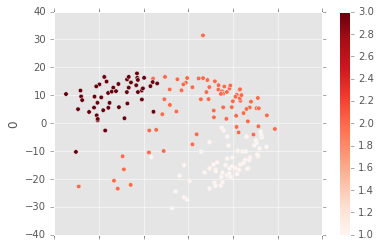

In [194]:
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0,color=df.Class[:],colormap='Reds')

In [196]:
df = pd.read_csv("dow_jones_index/dow_jones_index.data")

In [197]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173,$17.33,$17.37,0.230814,97,0.175029


In [198]:
df.close = df.close.apply( lambda x: float(x[1:]))

In [199]:
import datetime
df.date = df.date.apply( lambda x: datetime.\
    datetime(int(x.split('/')[2]),int(x.split('/')[0]),int(x.split('/')[1])))

In [229]:
df_pivot = df.pivot('stock','date','close').reset_index()
df_pivot.head()

date,stock,2011-01-07 00:00:00,2011-01-14 00:00:00,2011-01-21 00:00:00,2011-01-28 00:00:00,2011-02-04 00:00:00,2011-02-11 00:00:00,2011-02-18 00:00:00,2011-02-25 00:00:00,2011-03-04 00:00:00,...,2011-04-21 00:00:00,2011-04-29 00:00:00,2011-05-06 00:00:00,2011-05-13 00:00:00,2011-05-20 00:00:00,2011-05-27 00:00:00,2011-06-03 00:00:00,2011-06-10 00:00:00,2011-06-17 00:00:00,2011-06-24 00:00:00
0,AA,16.42,15.97,15.79,16.13,17.14,17.37,17.28,16.68,16.58,...,16.97,17.00,17.15,17.10,16.26,16.48,15.92,15.28,14.72,15.23
1,AXP,44.36,46.25,46.00,43.86,43.82,46.75,45.53,43.53,43.72,...,47.11,49.08,50.20,49.49,51.19,51.13,49.28,47.74,48.50,48.34
2,BA,69.38,70.07,71.68,69.23,71.38,72.14,73.04,72.30,71.80,...,75.44,79.78,79.31,79.03,77.52,76.99,74.84,72.69,74.16,71.26
3,BAC,14.25,15.25,14.25,13.60,14.29,14.77,14.75,14.20,14.12,...,12.31,12.28,12.31,11.93,11.58,11.69,11.28,10.80,10.68,10.52
4,CAT,93.73,94.01,92.75,95.68,99.59,103.54,105.86,102.00,103.04,...,109.42,115.41,110.34,106.33,104.33,104.60,101.10,96.79,95.95,100.01


/usr/local/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


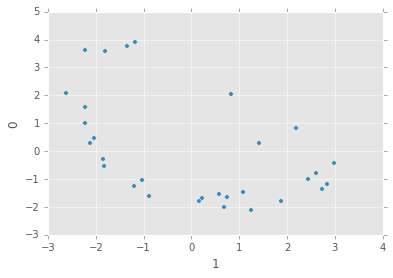

In [239]:
import numpy as np
correlations = np.corrcoef(np.float64(np.array(df_pivot)[:,2:]))
mds_coords = MDS().fit_transform(correlations)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)

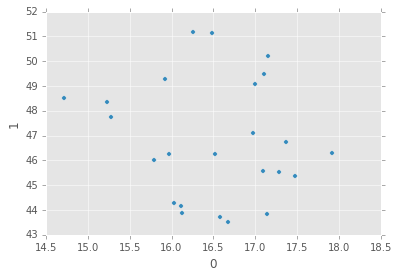

In [240]:
import numpy as np
correlations = np.corrcoef(np.float64(np.array(df_pivot)[:,2:]))
mds_coords = MDS().fit_transform(correlations)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)df_pivot.iloc[0:2].transpose().iloc[2:].plot(kind='scatter',x=0,y=1)

/usr/local/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


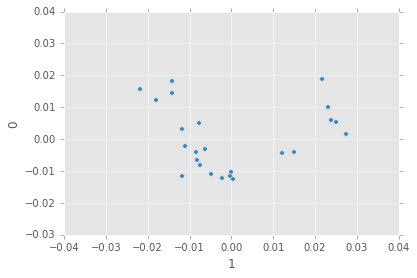

In [245]:
import scipy.stats
correlations2 = scipy.stats.spearmanr(np.float64(np.array(df_pivot)[:,1:]))
mds_coords = MDS().fit_transform(correlations2.correlation)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)

In [89]:
from fastdtw import fastdtw

In [247]:
dtw_matrix = np.zeros(shape=(df_pivot.shape[0],df_pivot.shape[0]))

for i in np.arange(0,df_pivot.shape[0]):
    for j in np.arange(i+1,df_pivot.shape[0]):
        dtw_matrix[i,j] = fastdtw(df_pivot.iloc[i,2:],df_pivot.iloc[j,2:])[0]

In [248]:
dtw_matrix+=dtw_matrix.transpose()

/usr/local/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


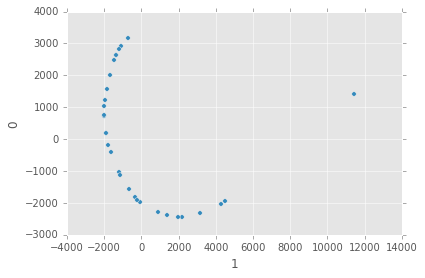

In [250]:
mds_coords = MDS().fit_transform(dtw_matrix)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)

In [251]:
df2 = pd.read_csv("Papers.csv",sep=",")

In [252]:
df2.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [253]:
keywords_mapping = {}
keyword_index = 0

for k in df2.keywords:
    k = k.split('\n')
    for kw in k:
        if keywords_mapping.get(kw,None) is None:
            keywords_mapping[kw]='keyword_'+str(keyword_index)
            keyword_index+=1

In [274]:
for (k,v) in keywords_mapping.items():
    df2[v] = df2.keywords.map( lambda x: 1 if k in x.split('\n') else 0 )

In [275]:
df2.head().iloc[:,6:]

,keyword_422,keyword_1174,keyword_640,keyword_1287,keyword_312,keyword_378,keyword_826,keyword_9,keyword_865,keyword_1203,...,keyword_481,keyword_832,keyword_1209,keyword_455,keyword_607,keyword_428,keyword_1069,keyword_491,keyword_117,keyword_1003
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
distances = pairwise.pairwise_distances(np.float64(np.array(df2)[:,6:]),metric='manhattan')

/usr/local/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


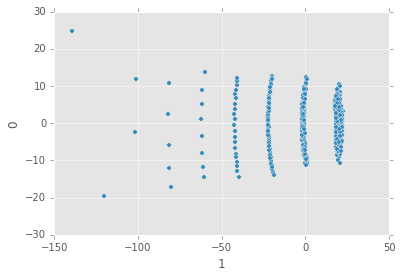

In [278]:
mds_coords = MDS().fit_transform(distances)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)

In [34]:
df = pd.read_csv("kmeans2.txt",sep="\t")

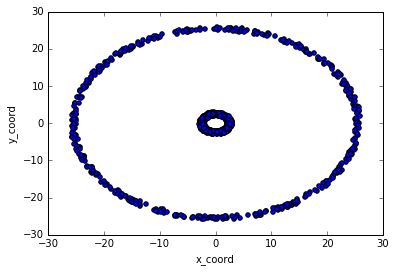

In [35]:
df.plot(kind='scatter', x='x_coord', y='y_coord')

In [99]:
from sklearn.cluster import KMeans

In [170]:
kmeans_clusters = KMeans(2).fit_predict(X=np.array(df)[:,1:])

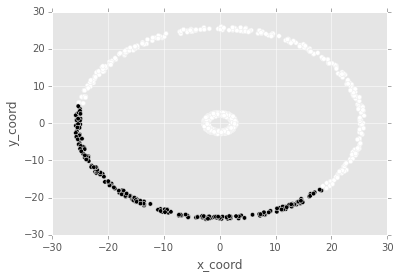

In [171]:
df.plot(kind='scatter', x='x_coord', y='y_coord', c=kmeans_clusters)

In [305]:
from pyclust import KMedoids
kmedoids_clusters = KMedoids(2).fit_predict(np.array(df)[:,1:])

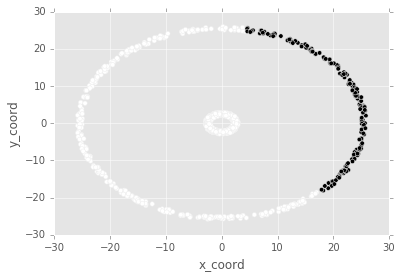

In [307]:
df.plot(kind='scatter', x='x_coord', y='y_coord', c=kmedoids_clusters)

In [185]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clusters = AgglomerativeClustering(2,linkage='ward').\
fit_predict(X=np.array(df)[:,1:])

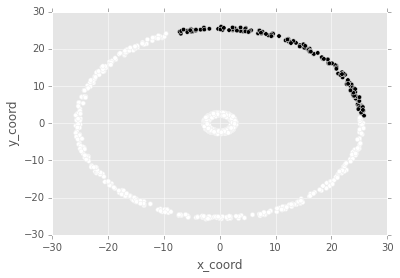

In [186]:
df.plot(kind='scatter', x='x_coord', y='y_coord', c=agglomerative_clusters)

/Users/jbabcock/anaconda3/lib/python3.4/site-packages/sklearn/cluster/hierarchical.py:440: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


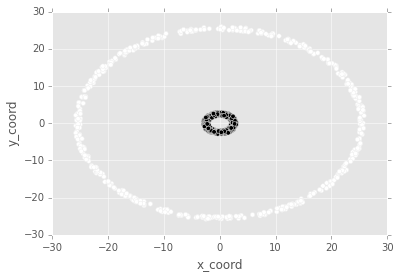

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
L = kneighbors_graph(np.array(df)[:,1:], n_neighbors=10, include_self=False)
L = 0.5 * (L + L.T)
agglomerative_clusters = AgglomerativeClustering(n_clusters=2,connectivity=L,linkage='average').fit_predict(X=np.array(df)[:,1:])
df.plot(kind='scatter', x='x_coord', y='y_coord', c=agglomerative_clusters)

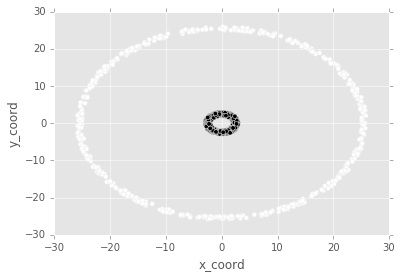

In [333]:
spectral_clusters = sklearn.cluster.SpectralClustering(2).fit_predict(np.array(df)[:,1:])
df.plot(kind='scatter', x='x_coord', y='y_coord', c=spectral_clusters)

In [51]:
distances[0,1:100]

array([  31.26501239,  122.83115403,  415.24539985,  330.17450008,
        385.29595988,  227.12947365,  230.09159915,   36.11696554,
         35.27497697,  445.55102603,  217.37853919,  257.81932782,
         92.41866695,  482.66694273,  245.47425934,  215.16396492,
         66.27069714,  615.30369055,  220.28274694,  285.00237596,
        296.08653769,   39.76334116,   59.45622844,  222.22987738,
        235.22246598,  134.38352354,  222.48120977,  151.38254952,
         43.1612998 ,  221.64284672,  450.50692703,   78.49626552,
        170.12507517,   34.71830353,  147.57804274,  185.79160934,
         49.53119219,   53.60958403,  305.02052718,  270.18798012,
         47.83493911,   39.71841512,  385.76405328,  181.11953677,
         22.34074753,   25.09466278,   84.1259104 ,   24.76023223,
        195.96157532,   92.00919519,  202.71217921,  126.04745614,
        310.23939321,   10.3928052 ,   56.31841617,   95.43410501,
        206.52897448,  220.82985917,  546.44816131,  385.90800

/usr/local/lib/python3.5/site-packages/numpy-1.10.2-py3.5-macosx-10.10-x86_64.egg/numpy/core/numeric.py:525: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


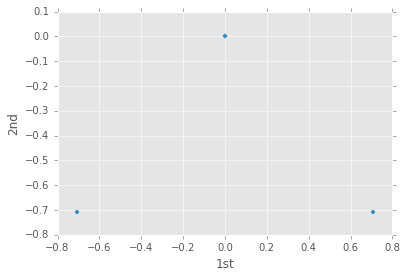

In [43]:
import numpy as np
distances = pairwise.euclidean_distances(df)
kernel_matrix = np.exp(-1.0 * distances ** 2)
[w, v ]= np.linalg.eig(kernel_matrix)
pd.\
DataFrame({'1st': v[:,0], '2nd': v[:,1]}).\
plot(kind='scatter',x='1st',y='2nd')

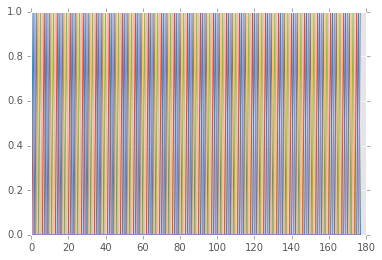

In [47]:
plt.plot(kernel_matrix)

In [44]:
df = pd.read_csv('kmeans.txt',sep='\t')

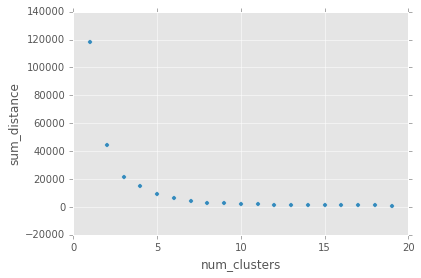

In [311]:
inertias = []
ks = np.arange(1,20)
for k in ks:
    inertias.append(KMeans(k).fit(X=np.array(df)[:,1:]).inertia_)
results = pd.DataFrame({"num_clusters": ks, "sum_distance": inertias})
results.plot(kind='scatter', x='num_clusters', y='sum_distance')

In [316]:
import sklearn
affinity_p_clusters = sklearn.cluster.AffinityPropagation().fit_predict(X=np.array(df)[:,1:])

In [323]:
len(np.unique(affinity_p_clusters))

309

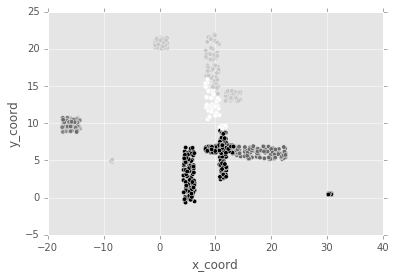

In [317]:
df.plot(kind='scatter',x='x_coord',y='y_coord',c=affinity_p_clusters)

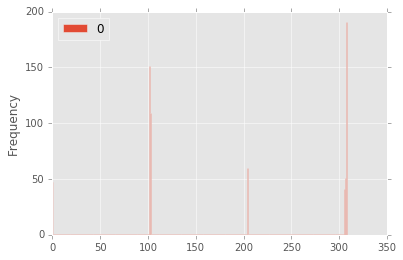

In [327]:
pd.DataFrame(affinity_p_clusters).plot(kind='hist',bins=np.unique(affinity_p_clusters))

In [142]:
results = pd.DataFrame({"num_clusters": ks, "sum_distance": inertias})

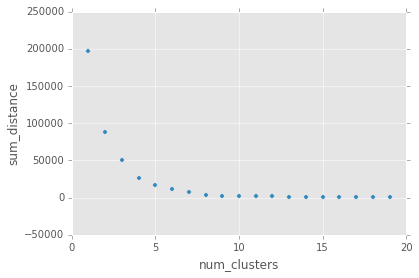

In [144]:
results.plot(kind='scatter', x='num_clusters', y='sum_distance')

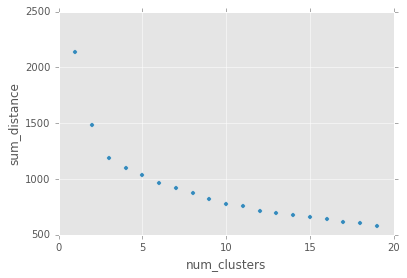

In [283]:
from sklearn.cluster import KMeans
inertias = []
ks = np.arange(1,20)
for k in ks:
    inertias.append(KMeans(k).fit(X=np.array(df_normalized)[:,1:]).inertia_)
results = pd.DataFrame({"num_clusters": ks, "sum_distance": inertias})
results.plot(kind='scatter', x='num_clusters', y='sum_distance')

In [149]:
kmeans_clusters = KMeans(2).fit_predict(np.matrix(df_normalized))